In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [37]:
mlb = pd.read_csv('final_ballpark_data.csv')
mlb.sort_values(by=['TEAM'], ignore_index=True, inplace=True)

In [38]:
wins = pd.read_html('https://www.baseball-reference.com/leagues/majors/index.shtml')

In [39]:
wins = wins[0][['Year', 'ARI', 'ATL', 'BAL', 'BOS', 'CHC', 'CHW', 'CIN', 'CLE', 'COL', 'DET', 'HOU', 'KCR', 'LAA', 'LAD', 'MIA', 'MIL', 'MIN', 'NYM', 'NYY', 'OAK', 'PHI', 'PIT', 'SDP', 'SFG', 'SEA', 'STL', 'TBR', 'TEX', 'TOR', 'WSN']]

In [40]:
teams = ['TEAM','Arizona', 'Atlanta', 'Baltimore', 'Boston', 'Chicago Cubs', 'Chicago White Sox', 'Cincinnati', 'Cleveland', 'Colorado', 'Detroit', 'Houston', 'Kansas City', 'LA Angels', 'LA Dodgers', 'Miami', 'Milwaukee', 'Minnesota', 'NY Mets', 'NY Yankees', 'Oakland', 'Philadelphia', 'Pittsburgh', 'San Diego', 'San Francisco', 'Seattle', 'St. Louis', 'Tampa Bay', 'Texas', 'Toronto', 'Washington']

In [41]:
wins.set_axis(teams, axis=1, inplace=True)

In [42]:
new_wins=wins.transpose().reset_index()

In [43]:
new_wins=new_wins.iloc[:,:12]

In [44]:
new_wins.columns = new_wins.iloc[0]
new_wins = new_wins[1:]
#new_wins[new_wins.columns] = new_wins[new_wins.columns].apply(pd.to_numeric, errors='coerce')

In [45]:
df = mlb.merge(new_wins, on='TEAM', how='inner')

In [46]:
rec_wins = wins.iloc[:11,:]

In [47]:
cols = ['Year','Arizona', 'Atlanta', 'Baltimore', 'Boston', 'Chicago Cubs', 'Chicago White Sox', 'Cincinnati', 'Cleveland', 'Colorado', 'Detroit', 'Houston', 'Kansas City', 'LA Angels', 'LA Dodgers', 'Miami', 'Milwaukee', 'Minnesota', 'NY Mets', 'NY Yankees', 'Oakland', 'Philadelphia', 'Pittsburgh', 'San Diego', 'San Francisco', 'Seattle', 'St. Louis', 'Tampa Bay', 'Texas', 'Toronto', 'Washington']
rec_wins.columns = cols

In [49]:
rec_wins[rec_wins.columns] = rec_wins[rec_wins.columns].apply(pd.to_numeric, errors='coerce')

/var/folders/y0/zyyyxk_s6fd8pksq6s_4htkm0000gn/T/ipykernel_81812/2451747839.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



(array([1., 0., 0., 0., 0., 2., 2., 1., 4., 1.]),
 array([ 24. ,  32.4,  40.8,  49.2,  57.6,  66. ,  74.4,  82.8,  91.2,
         99.6, 108. ]),
 <BarContainer object of 10 artists>)

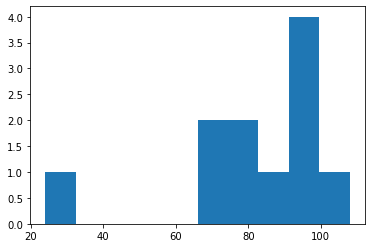

In [50]:
plt.hist(data=rec_wins, x='Boston')

In [51]:
corr_cols = []
for i in df.columns:
    if '2020' not in i and '2021' not in i and '2022' not in i:
        if 'AVG_overall' in i:
            corr_cols.append(i)
        if '_' not in i:
            corr_cols.append(i)

In [52]:
corr_df = df[corr_cols]

In [53]:
corr_df[['2019', '2018', '2017', '2016', '2015', '2014', '2013', '2012']] = corr_df[['2019', '2018', '2017', '2016', '2015', '2014', '2013', '2012']].apply(pd.to_numeric, errors='coerce')

/var/folders/y0/zyyyxk_s6fd8pksq6s_4htkm0000gn/T/ipykernel_81812/81201206.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



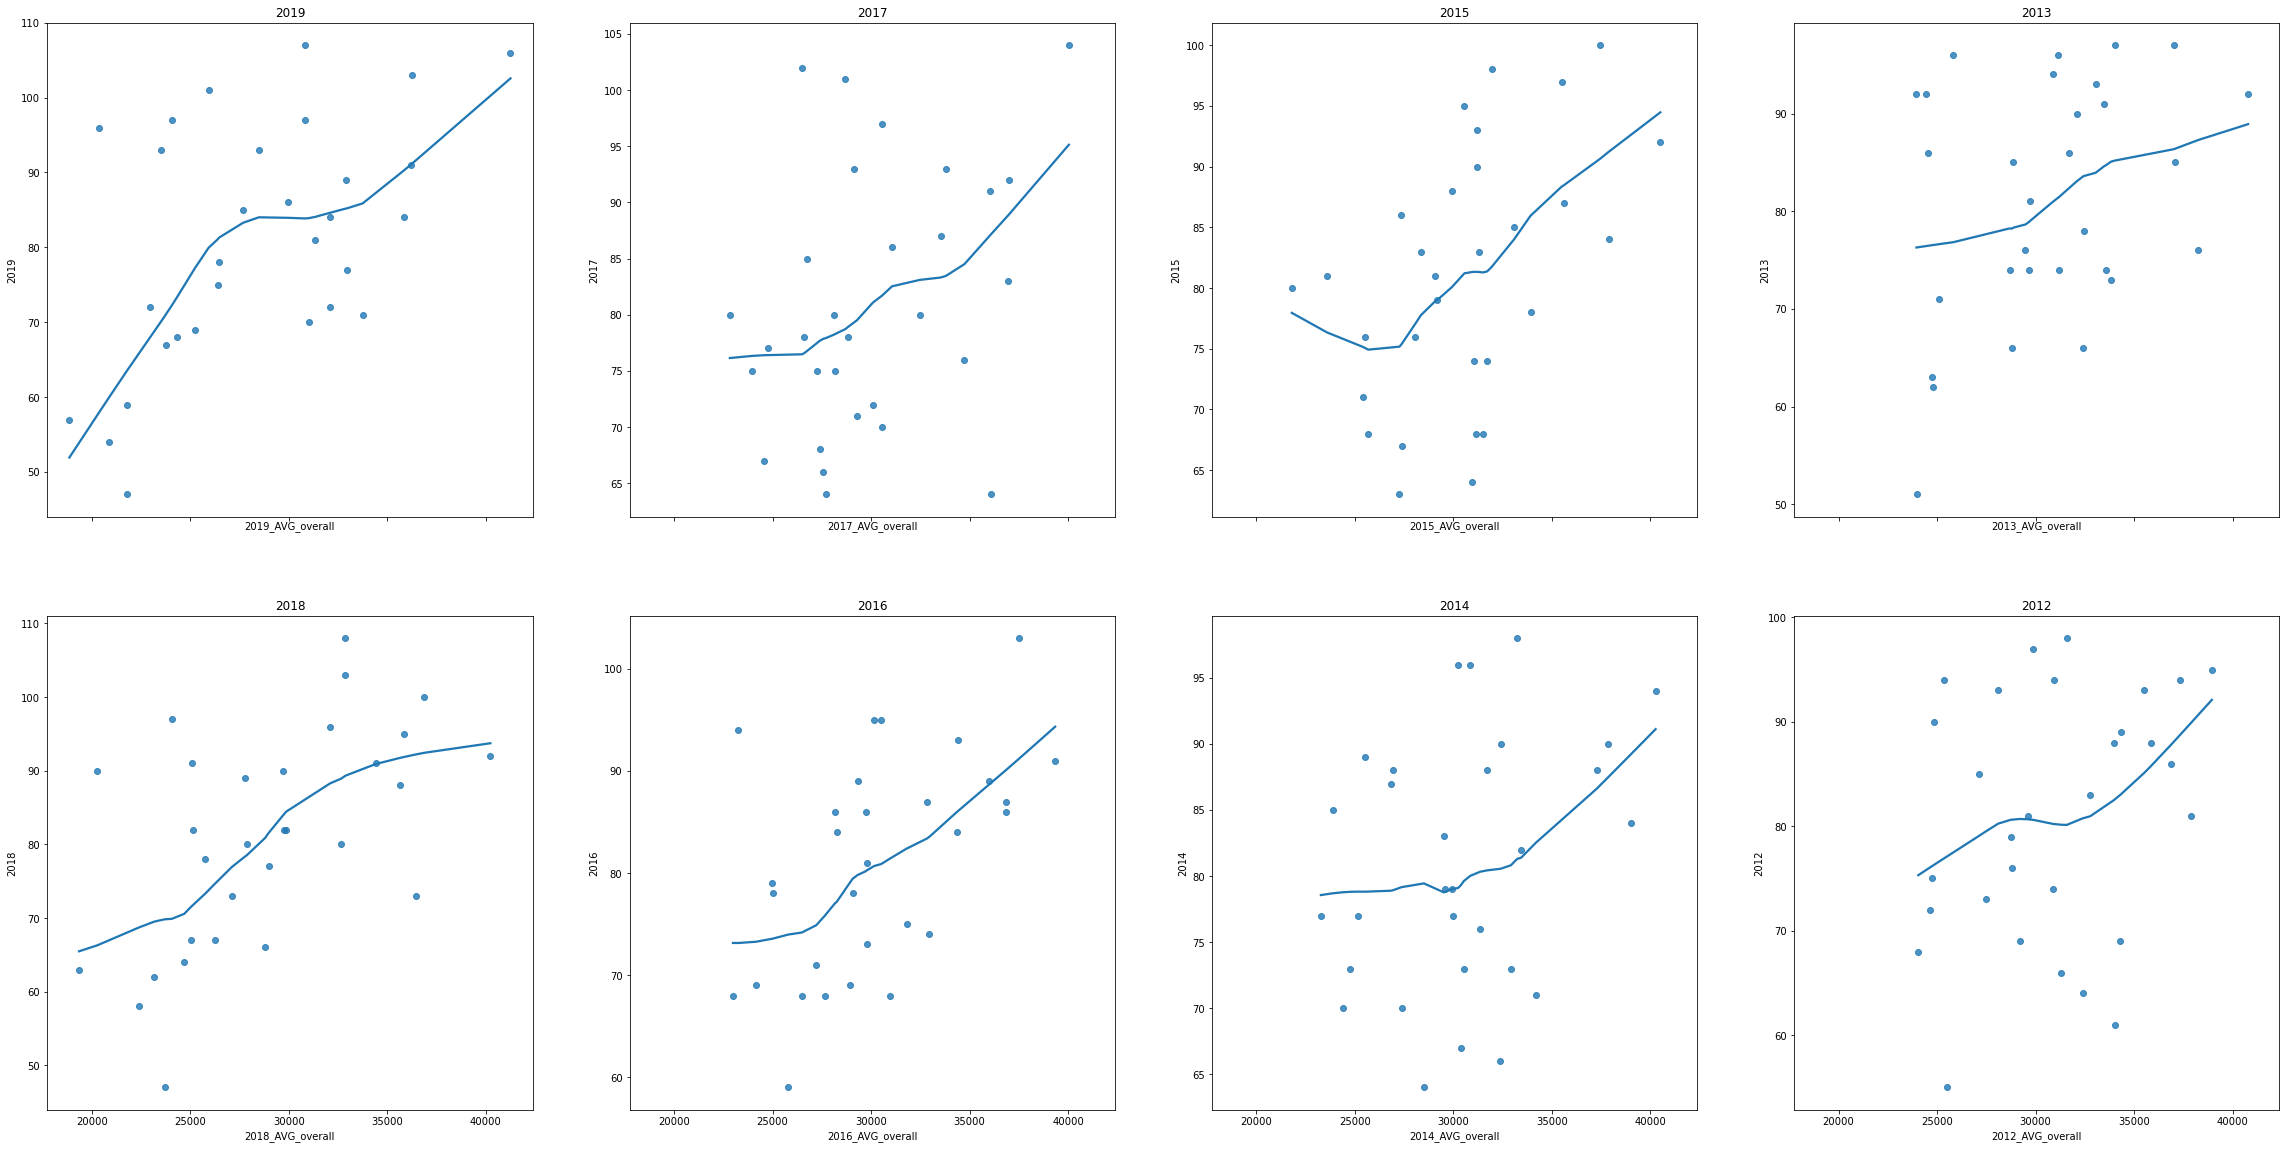

In [67]:
fig, axes = plt.subplots(2, 4, sharex=True, figsize=(40,20))
sns.regplot(data=corr_df, x='2019_AVG_overall', y='2019', ax=axes[0][0], lowess=True).set(title='2019')
sns.regplot(data=corr_df, x='2018_AVG_overall', y='2018', ax=axes[1][0], lowess=True).set(title='2018')
sns.regplot(data=corr_df, x='2017_AVG_overall', y='2017', ax=axes[0][1], lowess=True).set(title='2017')
sns.regplot(data=corr_df, x='2016_AVG_overall', y='2016', ax=axes[1][1], lowess=True).set(title='2016')
sns.regplot(data=corr_df, x='2015_AVG_overall', y='2015', ax=axes[0][2], lowess=True).set(title='2015')
sns.regplot(data=corr_df, x='2014_AVG_overall', y='2014', ax=axes[1][2], lowess=True).set(title='2014')
sns.regplot(data=corr_df, x='2013_AVG_overall', y='2013', ax=axes[0][3], lowess=True).set(title='2013')
sns.regplot(data=corr_df, x='2012_AVG_overall', y='2012', ax=axes[1][3], lowess=True).set(title='2012')
plt.savefig('avg_overall_scatter.png')
plt.show()

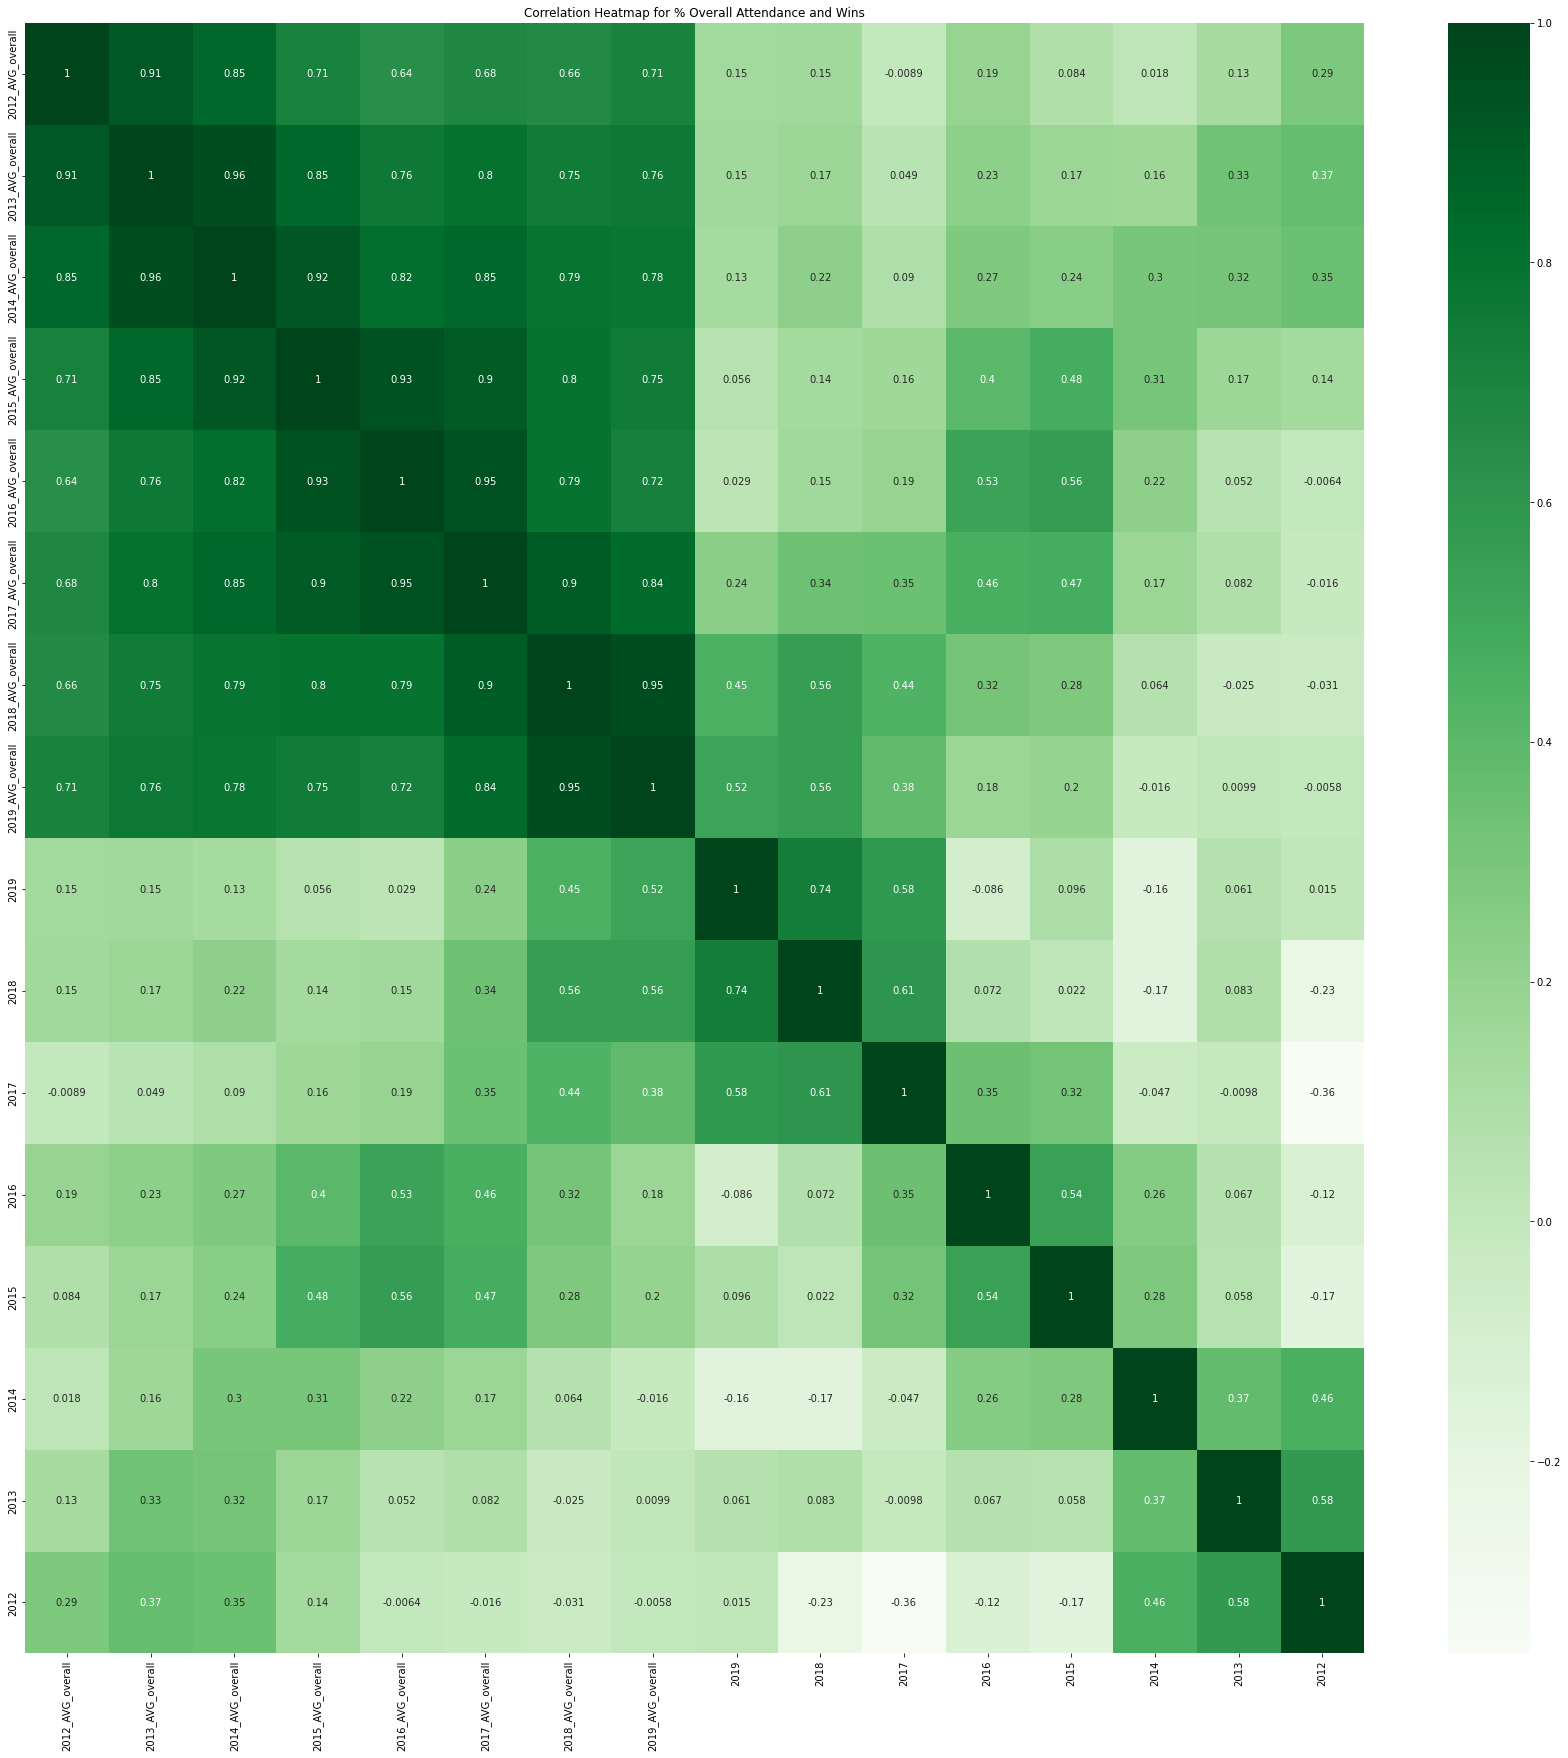

In [55]:
plt.figure(figsize=(30,30))
sns.heatmap(data=corr_df.corr(), annot=True, cmap='Greens').set(title='Correlation Heatmap for % Overall Attendance and Wins')
plt.show()


In [56]:
pct_cols = []
for i in df.columns:
    if '2019' not in i and '2020' not in i and '2021' not in i and '2022' not in i:
        if 'PCT_home' in i:
            pct_cols.append(i)
        if '_' not in i:
            pct_cols.append(i)

In [57]:
pct_df = df[pct_cols]

In [58]:
pct_df[['2018', '2017', '2016', '2015', '2014', '2013', '2012']] = pct_df[['2018', '2017', '2016', '2015', '2014', '2013', '2012']].apply(pd.to_numeric, errors='coerce')

/var/folders/y0/zyyyxk_s6fd8pksq6s_4htkm0000gn/T/ipykernel_81812/439373117.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



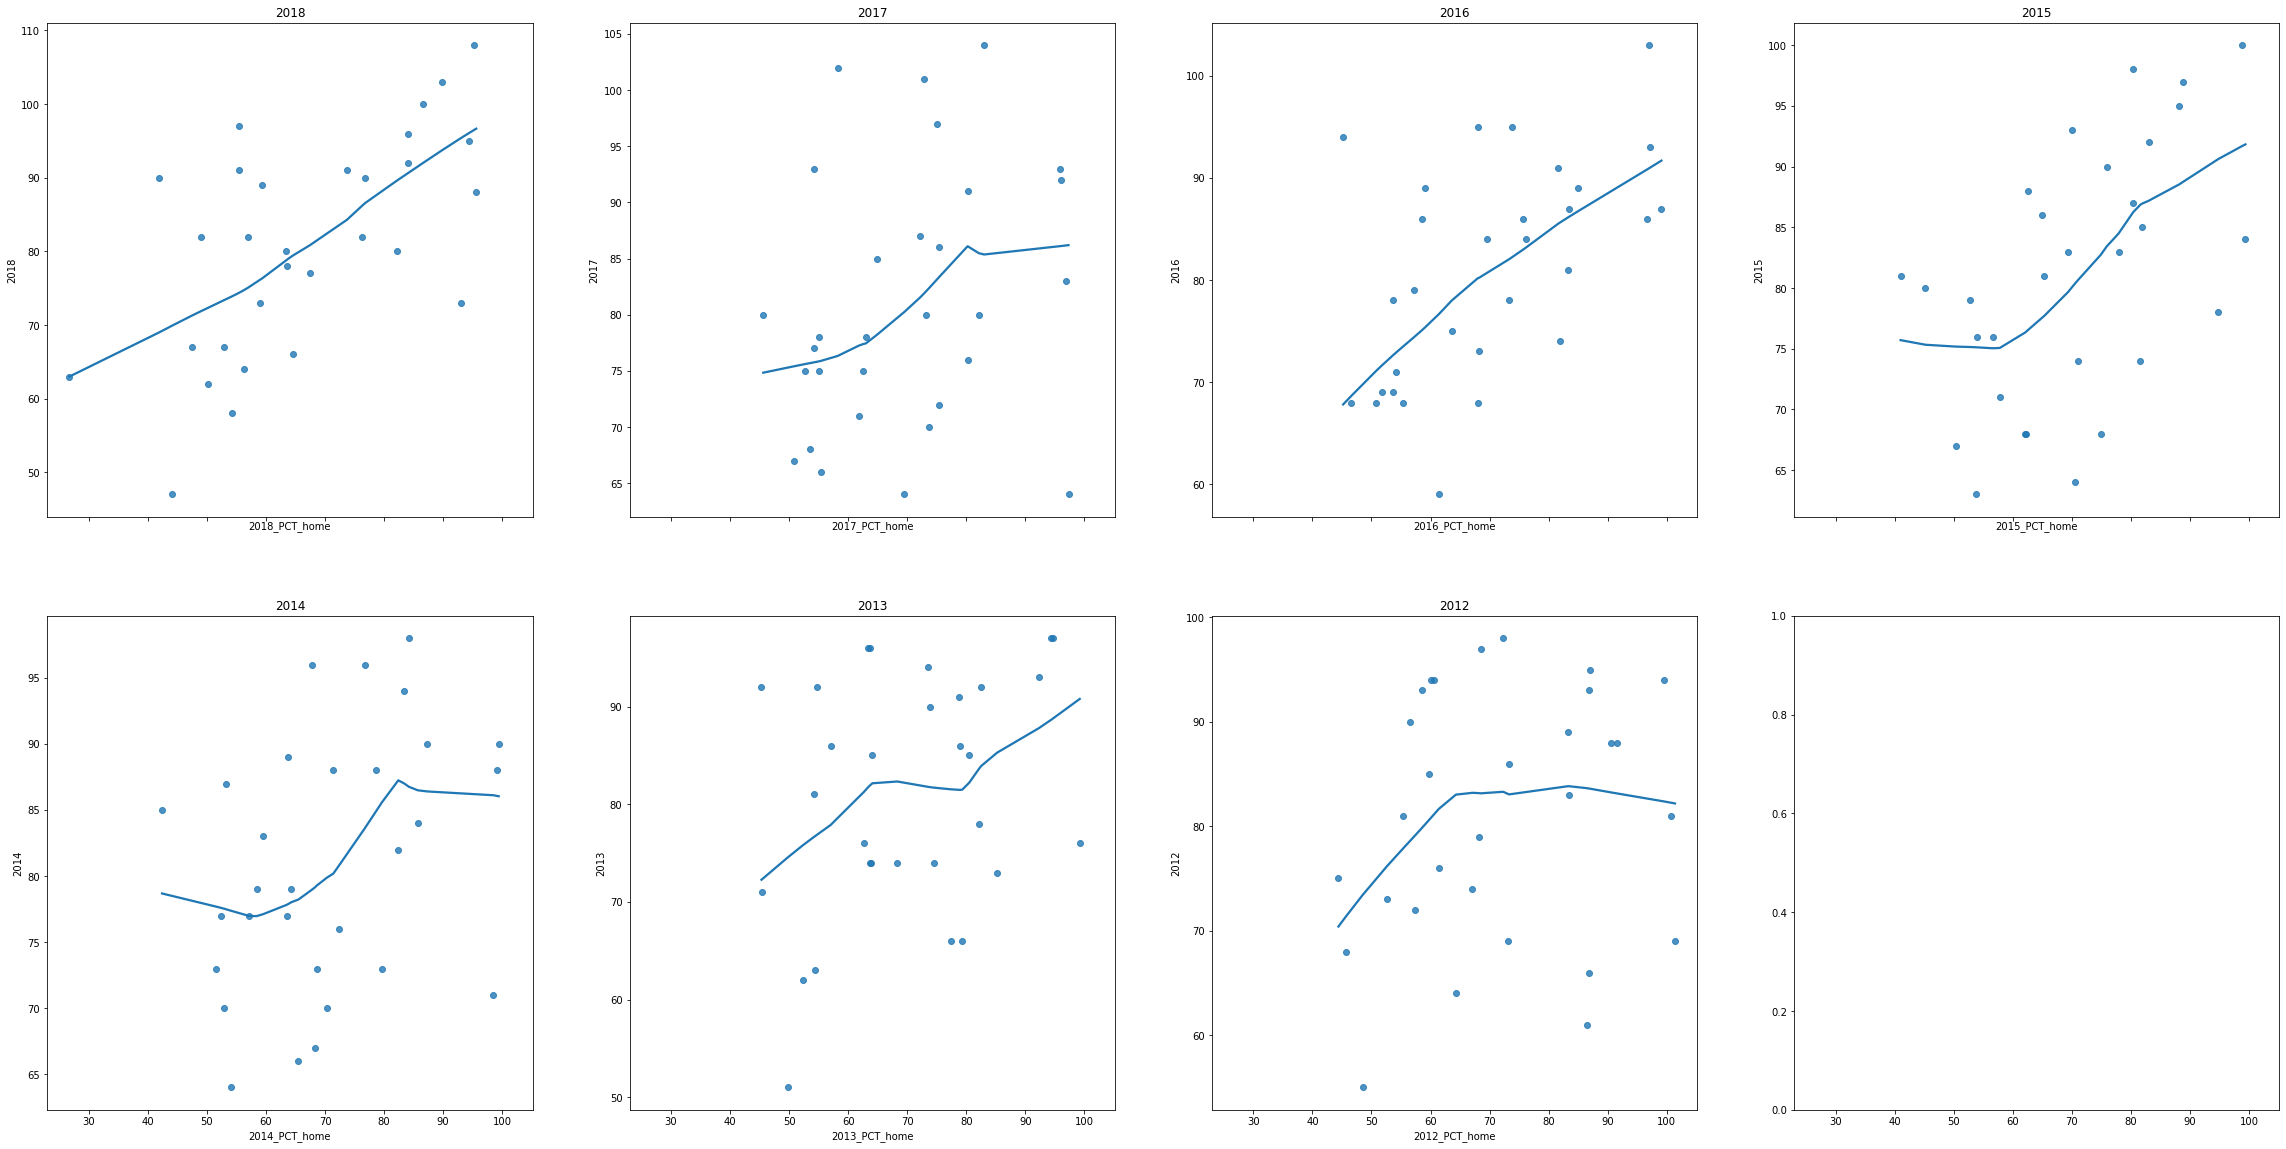

In [68]:
fig, axes = plt.subplots(2, 4, sharex=True, figsize=(40,20))
sns.regplot(data=pct_df, x='2018_PCT_home', y='2018', ax=axes[0][0], lowess=True).set(title='2018')
#sns.regplot(data=pct_df, x='2018_PCT_home', y='2018', ax=axes[0][1], lowess=True).set(title='2018')
sns.regplot(data=pct_df, x='2017_PCT_home', y='2017', ax=axes[0][1], lowess=True).set(title='2017')
sns.regplot(data=pct_df, x='2016_PCT_home', y='2016', ax=axes[0][2], lowess=True).set(title='2016')
sns.regplot(data=pct_df, x='2015_PCT_home', y='2015', ax=axes[0][3], lowess=True).set(title='2015')
sns.regplot(data=pct_df, x='2014_PCT_home', y='2014', ax=axes[1][0], lowess=True).set(title='2014')
sns.regplot(data=pct_df, x='2013_PCT_home', y='2013', ax=axes[1][1], lowess=True).set(title='2013')
sns.regplot(data=pct_df, x='2012_PCT_home', y='2012', ax=axes[1][2], lowess=True).set(title='2012')
plt.savefig('pct_home_scatter.png')
plt.show()

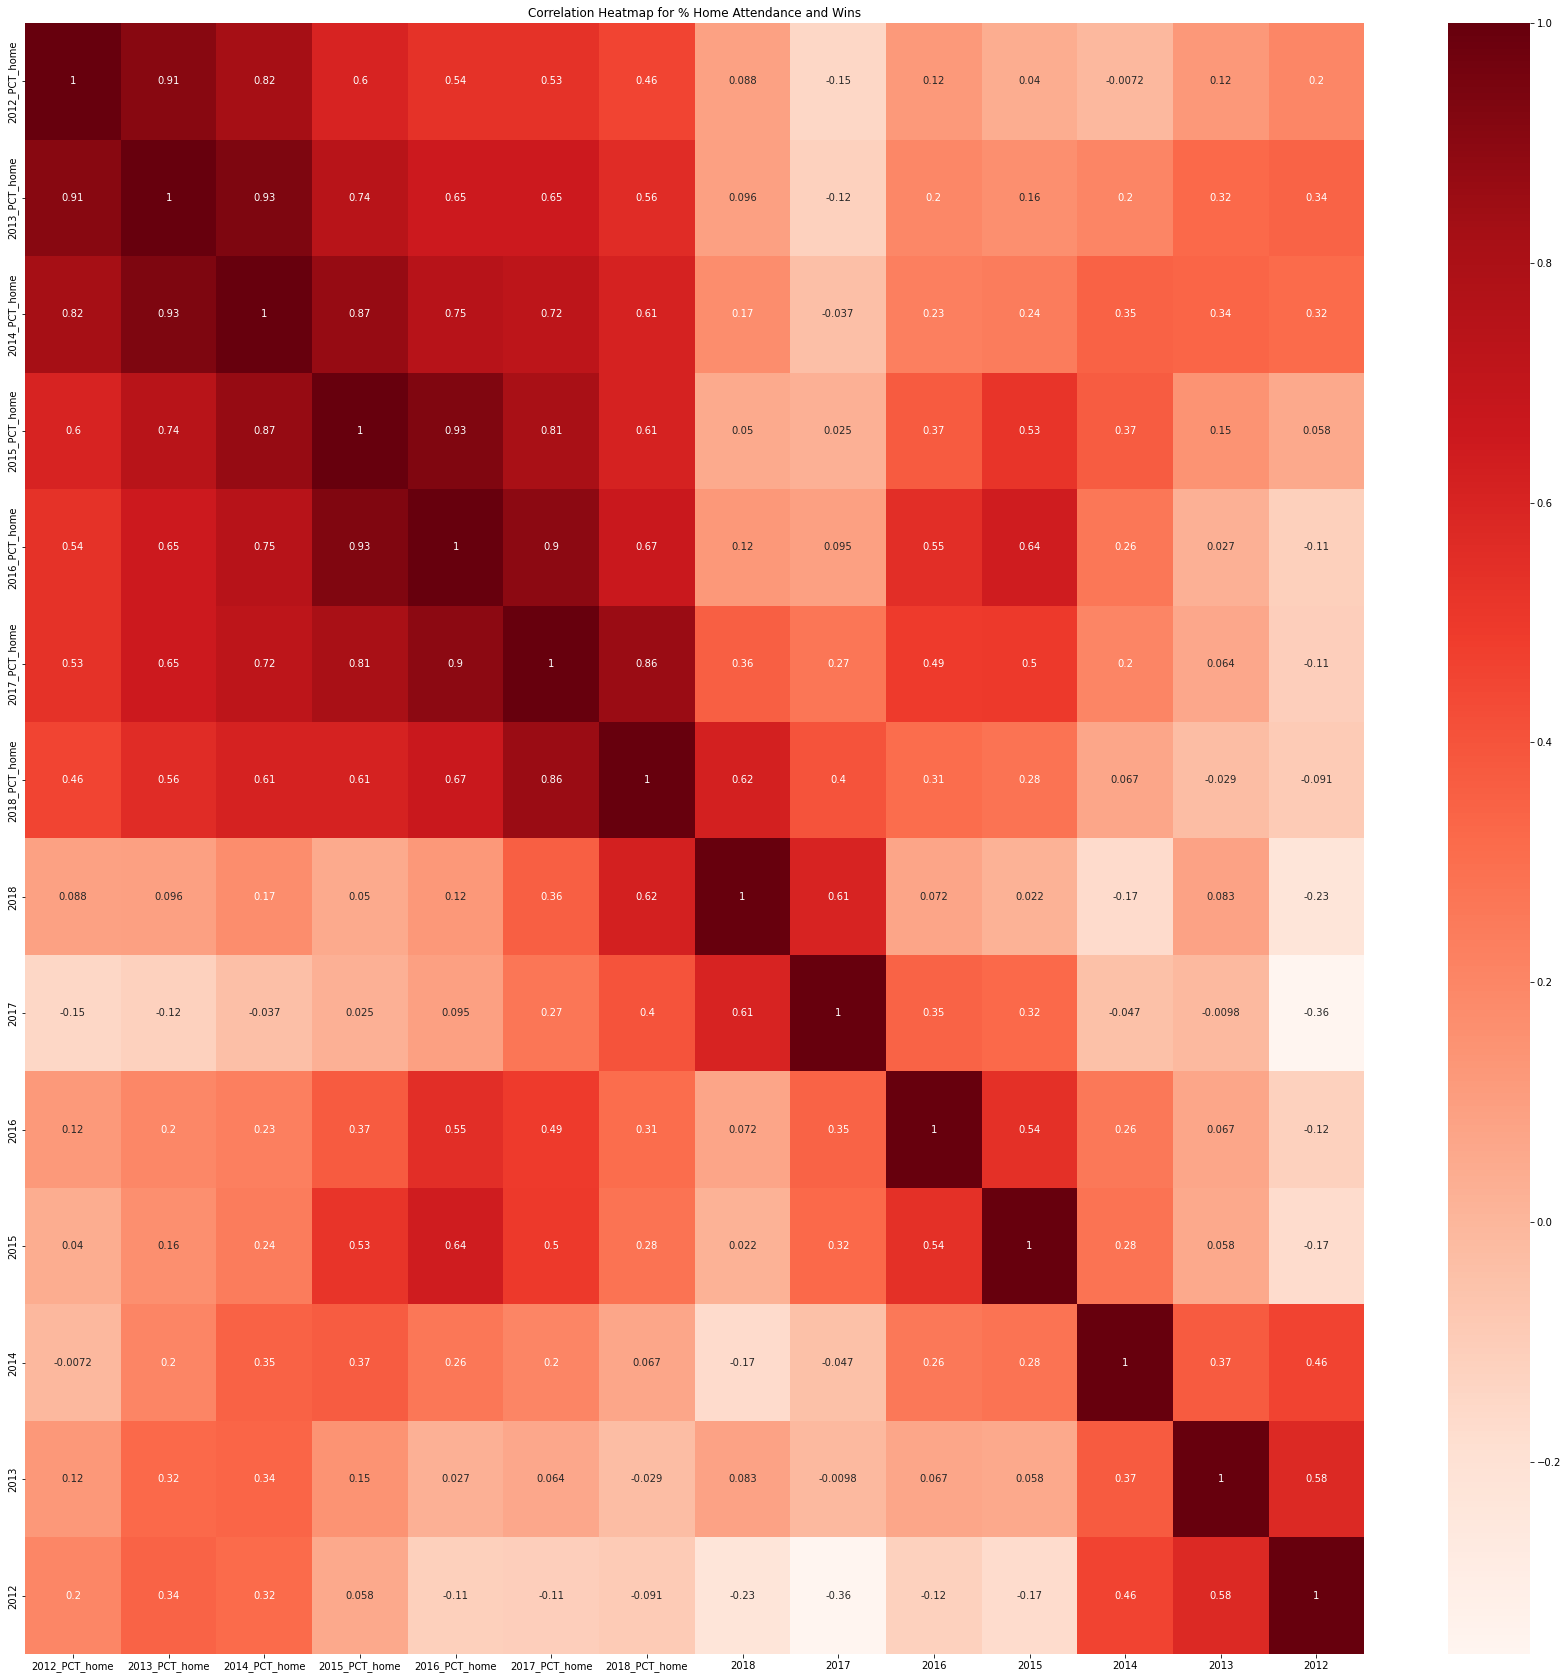

In [60]:
plt.figure(figsize=(30,30))
sns.heatmap(data=pct_df.corr(), annot=True, cmap='Reds').set(title='Correlation Heatmap for % Home Attendance and Wins')
plt.show()

In [61]:
home_road_cols = []
for i in df.columns:
    if '2019' not in i and '2020' not in i and '2021' not in i and '2022' not in i:
        if 'PCT_home' in i or 'PCT_road' in i or 'AVG_home' in i or 'AVG_road' in i:
            home_road_cols.append(i)
        if i == 'TEAM':
            home_road_cols.append(i)

In [62]:
home_road = df[home_road_cols]

In [64]:
fig = px.scatter(data_frame = home_road, x='2018_AVG_home', y='2018_AVG_road',color='TEAM',title='2018')
fig.show()
fig.write_html("2018.html", full_html=False, include_plotlyjs='cdn')

In [65]:
fig2 = px.scatter(data_frame = home_road, x='2015_AVG_home', y='2015_AVG_road',color='TEAM',title='2015')
fig2.show()
fig2.write_html("2015.html", full_html=False, include_plotlyjs='cdn')

In [66]:
fig3 = px.scatter(data_frame = home_road, x='2012_AVG_home', y='2012_AVG_road',color='TEAM',title='2012')
fig3.show()
fig3.write_html("2012.html", full_html=False, include_plotlyjs='cdn')